In [1]:
import time             
import numpy as np           # is the fundamental packeg     
import h5py                  # is library that interact with dataset
import matplotlib.pyplot as plt # is library to plot graph in python
import scipy                
from PIL import Image       # scipy and P
from scipy import ndimage
from NN1 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%reload_ext autoreload
%autoreload 2

np.random.seed(1)
    

In [2]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #  train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) #  train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #  test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) #  test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


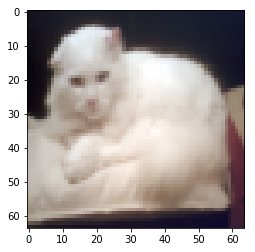

In [4]:
# Example of a picture
index = 13
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [5]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

In [6]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [7]:
Neuro_Model = Neural_Network([12288, 20, 7, 5, 1], train_y, 0.0075 )
for i in range(0,2500):
    Neuro_Model.Train_NN(1,train_x)
    if i%100 == 0: print(Neuro_Model.Test_NN(train_x,train_y)[-1])

0.511961722488
0.674641148325
0.746411483254
0.775119617225
0.808612440191
0.784688995215
0.904306220096
0.913875598086
0.918660287081
0.947368421053
0.956937799043
0.971291866029
0.976076555024
0.976076555024
0.980861244019
0.980861244019
0.980861244019
0.980861244019
0.980861244019
0.980861244019
0.980861244019
0.980861244019
0.980861244019
0.980861244019
0.985645933014


In [8]:
print(Neuro_Model.Test_NN(train_x,train_y)[-1])
print(Neuro_Model.Test_NN(test_x,test_y)[-1])


0.985645933014
0.8


[[ 1.]] 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


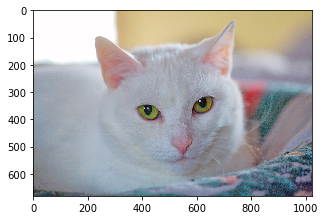

In [12]:
## START CODE HERE ##
my_image = "my_image.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_image = my_image/255.
my_predicted_image, accuracy = Neuro_Model.Test_NN(my_image, my_label_y, print_cost = False)
print(my_predicted_image, accuracy)
plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")